In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import time
import seaborn as sns



#USING CROSS VALIDATION
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [2]:
'''
Cargamos CSV
'''

df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.keys()

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
'''
Comprobacion del data set
'''

'\nComprobacion del data set\n'

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [7]:
df.shape

(119390, 32)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [10]:
df.isna().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


<Axes: >

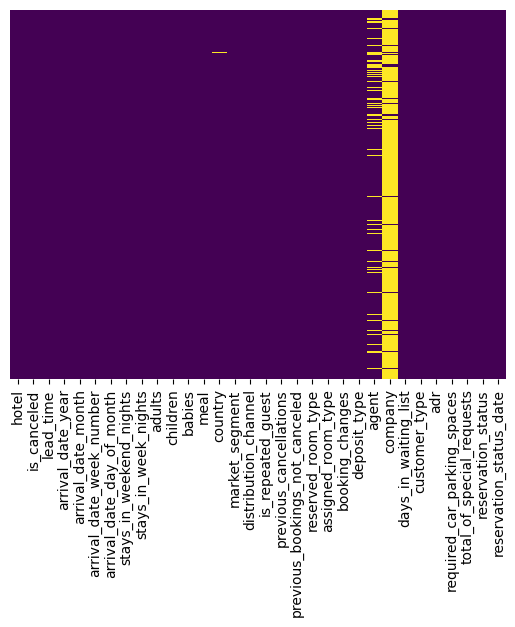

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
'''
Como podemos observar existen columnsacon valores perdidos, por lo que podemos 
eliminarlas ya que los datos no serán relevantes para la predicccion
'''

'\nComo podemos observar existen columnsacon valores perdidos, por lo que podemos \neliminarlas ya que los datos no serán relevantes para la predicccion\n'

In [13]:
data_c1 = df.copy()

In [14]:
data_c1.drop(['children','country', 'agent', 'company'], axis=1, inplace = True)

In [15]:
data_c1.isna().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
babies                            False
meal                              False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
days_in_waiting_list              False
customer_type                     False
adr                               False
required_car_parking_spaces       False


In [16]:
data_c1.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
babies                            False
meal                              False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
days_in_waiting_list              False
customer_type                     False
adr                               False
required_car_parking_spaces       False


<Axes: >

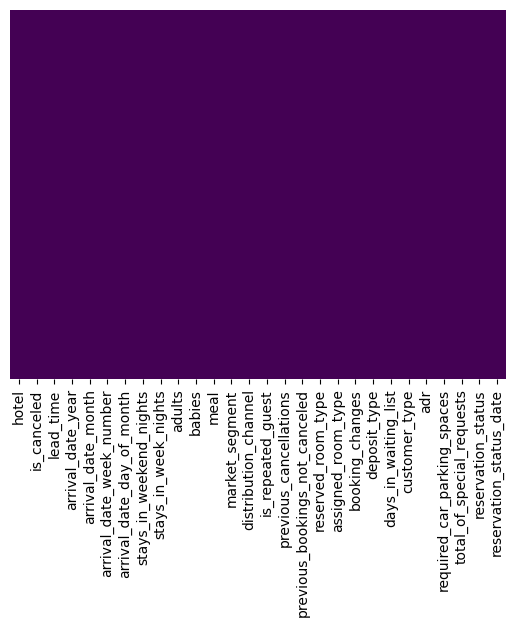

In [17]:
sns.heatmap(data_c1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
data_c1.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
babies                               5
meal                                 5
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
days_in_waiting_list               128
customer_type                        4
adr                               8879
required_car_parking_spaces          5
total_of_special_requests

In [19]:
print(data_c1['hotel'].value_counts())
print(data_c1['is_canceled'].value_counts())
print(data_c1['arrival_date_year'].value_counts())
print(data_c1['babies'].value_counts())
print(data_c1['meal'].value_counts())
print(data_c1['distribution_channel'].value_counts())
print(data_c1['is_repeated_guest'].value_counts())
print(data_c1['deposit_type'].value_counts())
print(data_c1['customer_type'].value_counts())
print(data_c1['reservation_status'].value_counts())

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64
is_canceled
0    75166
1    44224
Name: count, dtype: int64
arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64
babies
0     118473
1        900
2         15
10         1
9          1
Name: count, dtype: int64
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64
distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64
is_repeated_guest
0    115580
1      3810
Name: count, dtype: int64
deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64
customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64
reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64


C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


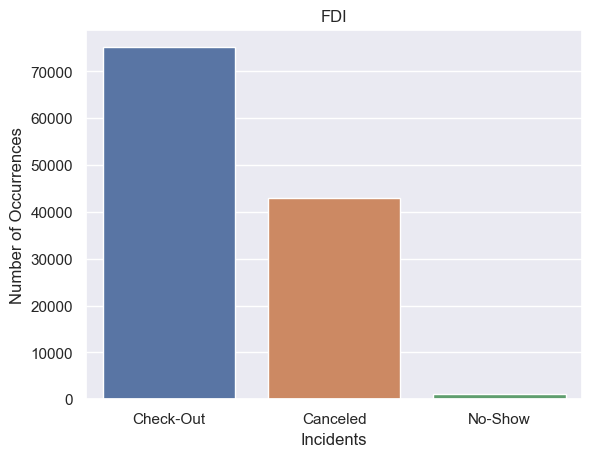

In [20]:
incidents_count = data_c1['reservation_status'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=incidents_count.index, y=incidents_count.values)
plt.title('FDI')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Incidents', fontsize=12)
plt.show()

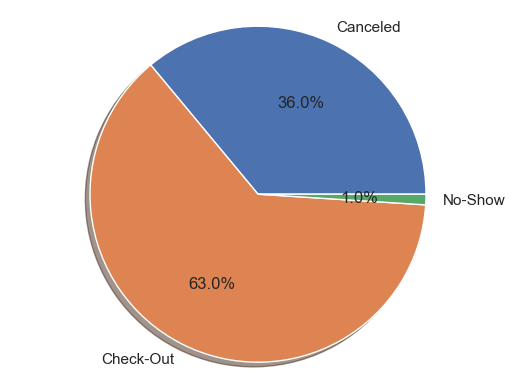

In [21]:
labels = data_c1['reservation_status'].astype('category').cat.categories.tolist()
counts = data_c1['reservation_status'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow = True)
ax1.axis('equal')
plt.show()

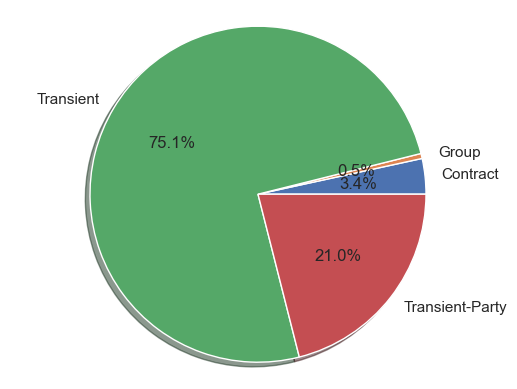

In [22]:
labels = data_c1['customer_type'].astype('category').cat.categories.tolist()
counts = data_c1['customer_type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow = True)
ax1.axis('equal')
plt.show()

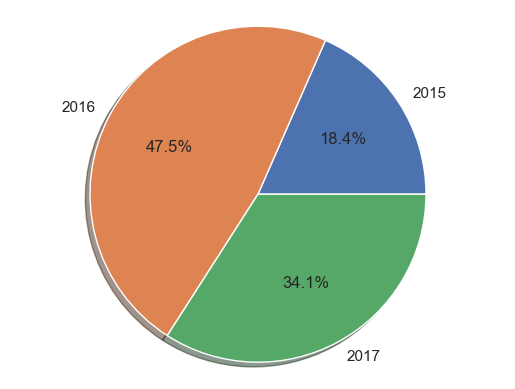

In [23]:
labels = data_c1['arrival_date_year'].astype('category').cat.categories.tolist()
counts = data_c1['arrival_date_year'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow = True)
ax1.axis('equal')
plt.show()

In [24]:
data_c1.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   assigned_room_type booking_changes deposit_type days_in_waiting_list  \
0                   C               3   No Deposit                    0   
1                   C               4   No Deposit                    0   
2                   C               0   No Deposit                    0   
3                   A               0   No Deposit                    0   
4                   A               0   No Deposit                    0   

   customer_type   adr  required_car_parking_spaces total_of_special_requests  \
0      Transient   0.0                            0                         0   
1      Transient   0.0                            0                         0   
2      Transient  75.0                            0                         0   
3      Transient  75.0                            0                         0   
4      Transient  98.0                            0                         1   

  reservation_status  reservation_status_date  
0          Check-Out               2015-07-01  
1          Check-Out               2015-07-01  
2          Check-Out               2015-07-02  
3          Check-Out               2015-07-02  
4          Check-Out               2015-07-03  

[5 rows x 28 columns]

In [25]:
print(data_c1['hotel'].value_counts())
print(data_c1['hotel'].value_counts(normalize=True))

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64
hotel
City Hotel      0.664461
Resort Hotel    0.335539
Name: proportion, dtype: float64


In [26]:
print(data_c1['customer_type'].value_counts())


customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64


In [27]:
print(data_c1.duplicated().sum())
print(data_c1.info())
print(df.drop_duplicates(inplace=True))
print(data_c1.info())

33824
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  market_seg

In [28]:
data_c1['adr'].value_counts(normalize=True)

adr
62.00     0.031443
75.00     0.022741
90.00     0.020714
65.00     0.020253
0.00      0.016408
            ...   
89.43     0.000008
63.07     0.000008
55.69     0.000008
49.51     0.000008
157.71    0.000008
Name: proportion, Length: 8879, dtype: float64

Histogram: Axes(0.125,0.11;0.775x0.77)


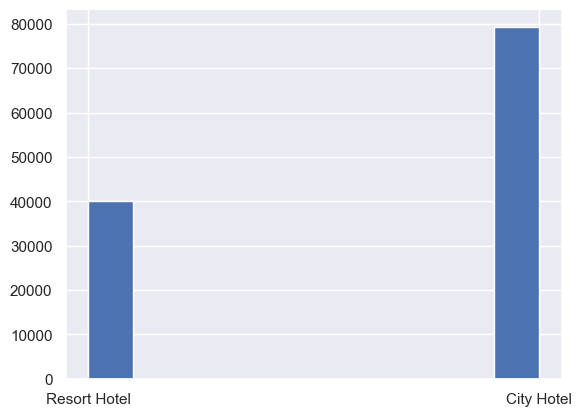

In [29]:
print(f"Histogram: {data_c1['hotel'].hist()}")

In [30]:
data_c1.groupby(by=['hotel']).mean(numeric_only=True)

is_canceled   lead_time  arrival_date_year  \
hotel                                                      
City Hotel       0.417270  109.735724        2016.174285   
Resort Hotel     0.277634   92.675686        2016.121443   

              arrival_date_week_number  arrival_date_day_of_month  \
hotel                                                               
City Hotel                   27.177449                  15.786625   
Resort Hotel                 27.140864                  15.821243   

              stays_in_weekend_nights  stays_in_week_nights    adults  \
hotel                                                                   
City Hotel                   0.795185              2.182957  1.850977   
Resort Hotel                 1.189815              3.128732  1.867149   

                babies  is_repeated_guest  previous_cancellations  \
hotel                                                               
City Hotel    0.004941           0.025615                0.079743   
Resort Hotel  0.013904           0.044383                0.101722   

              previous_bookings_not_canceled  booking_changes  \
hotel                                                           
City Hotel                          0.132371         0.187369   
Resort Hotel                        0.146455         0.287968   

              days_in_waiting_list         adr  required_car_parking_spaces  \
hotel                                                                         
City Hotel                3.226774  105.304465                     0.024367   
Resort Hotel              0.527758   94.952930                     0.138068   

              total_of_special_requests  
hotel                                    
City Hotel                     0.546918  
Resort Hotel                   0.619770

C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

<Axes: ylabel='required_car_parking_spaces'>

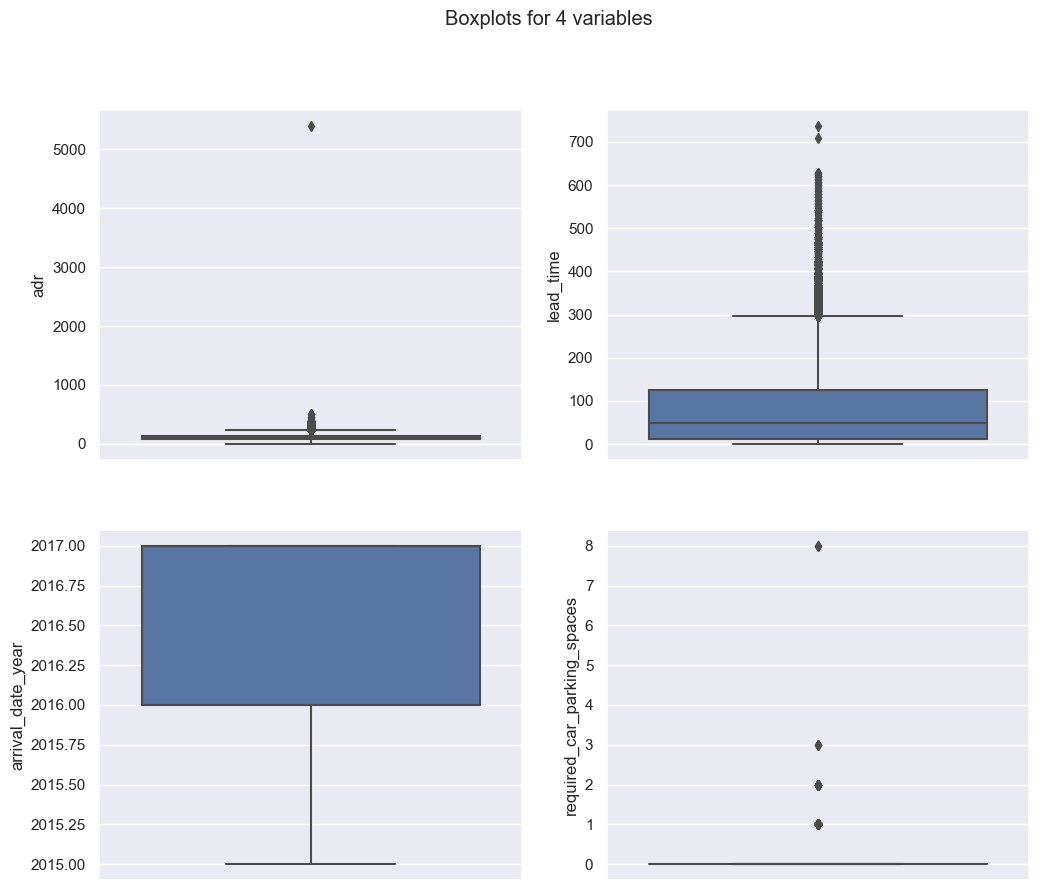

In [31]:
fig, axs = plt.subplots(2,2, figsize=(12, 10))
fig.suptitle('Boxplots for 4 variables')
sns.boxplot(y=df['adr'], ax=axs[0, 0])
sns.boxplot(y=df['lead_time'], ax=axs[0, 1])
sns.boxplot(y=df['arrival_date_year'], ax=axs[1, 0])
sns.boxplot(y=df['required_car_parking_spaces'], ax=axs[1, 1])

In [32]:
data_c1

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  assigned_room_type booking_changes  \
0                          0       2  ...                   C               3   
1                          0       2  ...                   C               4   
2                          1       1  ...                   C               0   
3                          1       1  ...                   A               0   
4                          2       2  ...                   A               0   
...                      ...     ...  ...                 ...             ...   
119385                     5       2  ...                   A               0   
119386                     5       3  ...                   E               0   
119387                     5       2  ...                   D               0   
119388                     5       2  ...                   A               0   
119389                     7       2  ...                   A               0   

       deposit_type days_in_waiting_list  customer_type     adr  \
0        No Deposit                    0      Transient    0.00   
1        No Deposit                    0      Transient    0.00   
2        No Deposit                    0      Transient   75.00   
3        No Deposit                    0      Transient   75.00   
4        No Deposit                    0      Transient   98.00   
...             ...                  ...            ...     ...   
119385   No Deposit                    0      Transient   96.14   
119386   No Deposit                    0      Transient  225.43   
119387   No Deposit                    0      Transient  157.71   
119388   No Deposit                    0      Transient  104.40   
119389   No Deposit                    0      Transient  151.20   

        required_car_parki

In [33]:
#Ceramos nuestra 'x', las entradas, y nuestra 'y', la salida 

x = data_c1.drop(['is_canceled'], axis=1)
y = data_c1['is_canceled'].to_frame()

In [34]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.005, random_state=2021)

In [35]:
x_train1 = x_train1.drop(['hotel','arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date'], axis=1)

x_test1 = x_test1.drop(['hotel','arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date'], axis=1)

In [36]:
clf = DecisionTreeClassifier(random_state=2021)

In [37]:
clf.fit(x_train1, y_train1)

DecisionTreeClassifier(random_state=2021)

In [38]:
predictions1 = clf.predict(x_test1)
predictions1

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,

In [39]:
accuracy_score(y_test1, predictions1)

0.8174204355108877

In [40]:
precision_score(y_test1, predictions1)

0.7181818181818181

In [41]:
recall_score(y_test1, predictions1)

0.7707317073170732

In [42]:
roc_auc_score(y_test1, predictions1)

0.8062842210054754

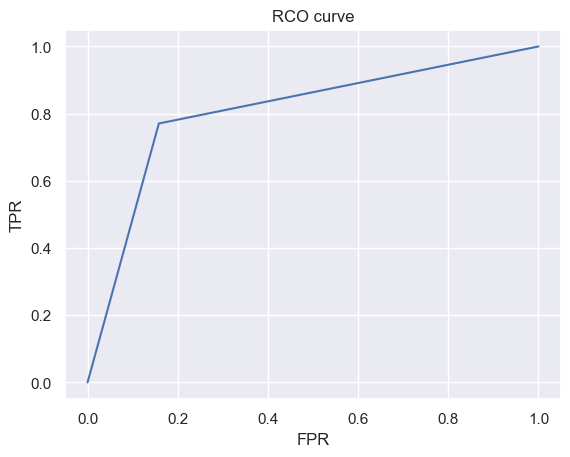

In [43]:
fpr, tpr, _ = roc_curve(y_test1, predictions1)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RCO curve')
plt.show()


In [44]:
'''
Ahora vamos a realizar la prediccion de la Tarifa diaria promedio (ADR)
'''

'\nAhora vamos a realizar la prediccion de la Tarifa diaria promedio (ADR)\n'

In [45]:
x = data_c1.drop(['adr'], axis=1)

y = data_c1['adr'].to_frame()

In [46]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.005, random_state=2021)

In [47]:
x_train2 = x_train2.drop(['hotel','arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date'], axis=1)

x_test2 = x_test2.drop(['hotel','arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date'], axis=1)

In [48]:
clf = DecisionTreeRegressor(random_state=2021)

In [49]:
clf.fit(x_train2, y_train2)

DecisionTreeRegressor(random_state=2021)

In [50]:
predictions2 = clf.predict(x_test2)
predictions2

array([111.35      , 108.        ,  80.        ,  46.33333333,
       175.8       , 130.        , 201.5       ,  75.        ,
        76.        ,  60.        , 114.08      , 105.4       ,
       130.5       , 131.        ,  65.        , 126.        ,
        65.        ,  55.        ,  37.4       , 155.6       ,
       146.        , 205.33333333,  99.        , 159.33      ,
       125.27      ,  90.        ,  94.5       ,  50.        ,
        65.        , 132.33333333, 114.        , 118.5       ,
        48.33333333,  68.4       ,  70.61058824, 151.58      ,
       100.86      , 240.        , 147.9       ,   0.        ,
        84.        , 152.15      , 241.86      , 114.5       ,
        96.3       , 150.        , 289.        ,   0.        ,
       141.        ,  78.85      , 104.        ,  34.4       ,
        95.        , 158.6       ,  61.68      , 200.        ,
        99.        , 104.        , 146.        , 209.5       ,
        39.6       , 160.        ,   0.        , 109.  

SEGUNDO METODO REGRESION LINEAL 

In [51]:
x = data_c1.drop(['adr', 'hotel','arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date'], axis=1)

y = data_c1['adr'].to_frame()

In [52]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.005, random_state=2021)

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lm = LinearRegression()

In [55]:
lm.fit(x_train3, y_train3)

LinearRegression()

In [56]:
predictions3 = lm.predict(x_test3)

In [57]:
x = data_c1.drop(['is_canceled'], axis=1)
y = data_c1['is_canceled'].to_frame()

In [58]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.005, random_state=2021)

C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='is_canceled', ylabel='count'>

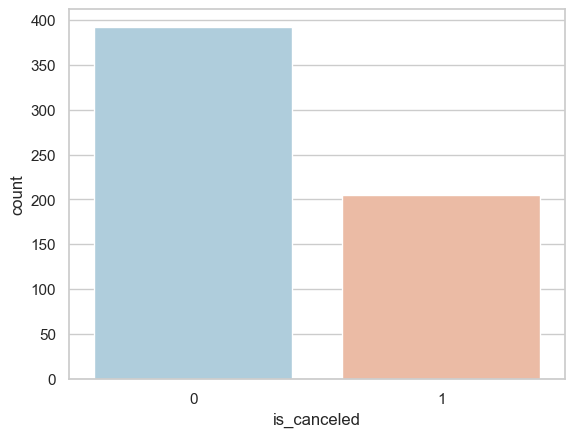

In [59]:
sns.set_style('whitegrid')
sns.countplot(x='is_canceled', data = pd.DataFrame(y_test4,columns=['is_canceled']),palette='RdBu_r')

C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='is_canceled', ylabel='count'>

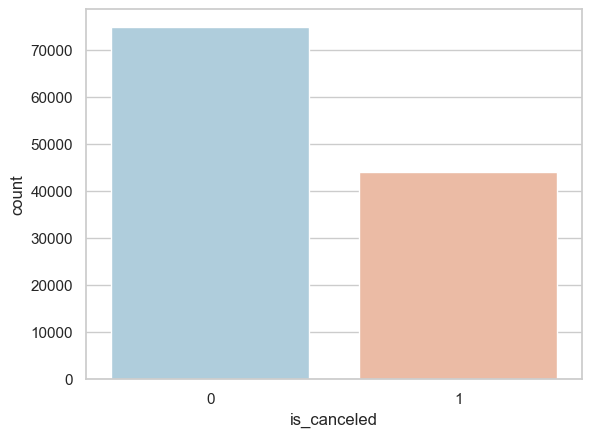

In [60]:
sns.set_style('whitegrid')
sns.countplot(x='is_canceled', data = pd.DataFrame(y_train4,columns=['is_canceled']),palette='RdBu_r')

In [61]:
x_train4 = x_train4.drop(['hotel','arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date'], axis=1)

x_test4 = x_test4.drop(['hotel','arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date'], axis=1)

In [62]:
starttime = time.process_time()

logmodel1 = LogisticRegression(random_state=2022, solver='newton-cg')
print(logmodel1)
logmodel1.fit(x_train4, y_train4)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

LogisticRegression(random_state=2022, solver='newton-cg')


C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time spent: 5.46875 seconds


C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [63]:
predictions41 = logmodel1.predict(x_test4)
predictions41

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [64]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(x, y, test_size=0.005, random_state=2021)

In [65]:
x_train5 = x_train5.drop(['hotel','arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date'], axis=1)

x_test5 = x_test5.drop(['hotel','arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date'], axis=1)

In [66]:
starttime = time.process_time()

logmodel2 = LogisticRegression(random_state=2022, solver='lbfgs')
print(logmodel2)
logmodel2.fit(x_train5,y_train5)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=2022)
Time spent: 0.609375 seconds


C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
predictions42 = logmodel2.predict(x_test5)
predictions42

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [68]:
starttime = time.process_time()

logmodel3 = LogisticRegression(random_state=2022, solver='liblinear')
print(logmodel3)
logmodel3.fit(x_train4,y_train4)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=2022, solver='liblinear')
Time spent: 1.1875 seconds


In [83]:
predictions43 = logmodel3.predict(x_test4)

In [69]:
dfp = df
dfp = df.drop(['hotel','arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date','children', 'agent', 'company'], axis=1)

In [70]:
df_feat = pd.DataFrame(dfp, columns=dfp.keys())
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     87396 non-null  int64  
 1   lead_time                       87396 non-null  int64  
 2   arrival_date_year               87396 non-null  int64  
 3   arrival_date_week_number        87396 non-null  int64  
 4   arrival_date_day_of_month       87396 non-null  int64  
 5   stays_in_weekend_nights         87396 non-null  int64  
 6   stays_in_week_nights            87396 non-null  int64  
 7   adults                          87396 non-null  int64  
 8   babies                          87396 non-null  int64  
 9   is_repeated_guest               87396 non-null  int64  
 10  previous_cancellations          87396 non-null  int64  
 11  previous_bookings_not_canceled  87396 non-null  int64  
 12  booking_changes                 8739

In [71]:
df_target = pd.DataFrame(df['is_canceled'].values,columns=['is_canceled'])
df_target.nunique()

is_canceled    2
dtype: int64

In [72]:
df_target.value_counts(normalize=True)

is_canceled
0              0.725102
1              0.274898
Name: proportion, dtype: float64

In [73]:
print(len(df_target))
df_target

87396


is_canceled
0                0
1                0
2                0
3                0
4                0
...            ...
87391            0
87392            0
87393            0
87394            0
87395            0

[87396 rows x 1 columns]

In [74]:
x_train6, x_test6, y_train6, y_test6 = train_test_split(df_feat, np.ravel(df_target), test_size=0.005, random_state=2021)

C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='is_canceled', ylabel='count'>

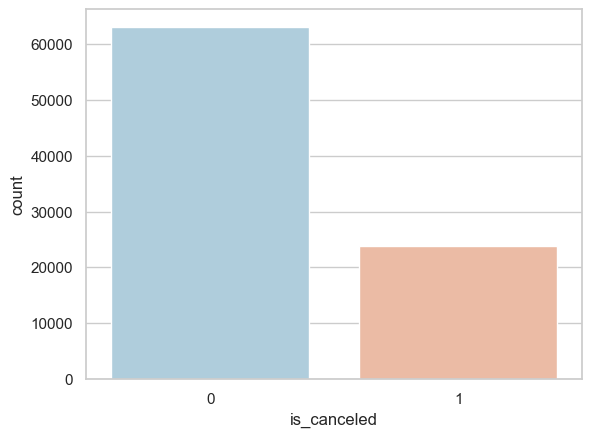

In [75]:
sns.set_style('whitegrid')
sns.countplot(x= 'is_canceled', data = pd.DataFrame(y_train6, columns=['is_canceled']), palette='RdBu_r')

C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='is_canceled', ylabel='count'>

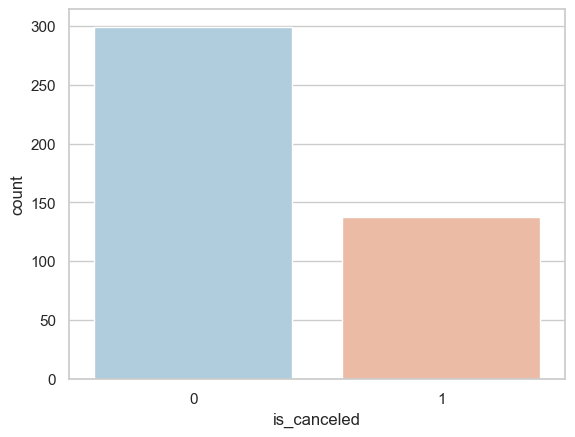

In [76]:
sns.set_style('whitegrid')
sns.countplot(x= 'is_canceled', data = pd.DataFrame(y_test6, columns=['is_canceled']), palette='RdBu_r')

In [77]:
#cross_valid_model = SVC(random_state=2021)
#scores = cross_val_score(cross_valid_model, df_feat, np.ravel(df_target), cv=10)
#scores

In [78]:
model = SVC(random_state=2021)

In [79]:
model.fit(x_train6,y_train6)

SVC(random_state=2021)

In [80]:
predictions6 = model.predict(x_test6)

In [81]:
print("%0.2f accuracy" % (accuracy_score(y_test6, predictions6)))

0.68 accuracy


In [84]:
print("With 'newton-cg': \n", classification_report(y_test4,predictions41))
print("With 'lbfgs': \n", classification_report(y_test5,predictions42))
print("With 'liblinear': \n", classification_report(y_test4,predictions43))
print("With 'decisiontreeclassifier': \n", classification_report(y_test1,predictions1))
print("With 'SVC': \n", classification_report(y_test6,predictions6))

With 'newton-cg': 
               precision    recall  f1-score   support

           0       0.76      0.88      0.81       392
           1       0.66      0.47      0.55       205

    accuracy                           0.74       597
   macro avg       0.71      0.67      0.68       597
weighted avg       0.73      0.74      0.72       597

With 'lbfgs': 
               precision    recall  f1-score   support

           0       0.75      0.89      0.81       392
           1       0.67      0.45      0.54       205

    accuracy                           0.74       597
   macro avg       0.71      0.67      0.68       597
weighted avg       0.73      0.74      0.72       597

With 'liblinear': 
               precision    recall  f1-score   support

           0       0.76      0.88      0.81       392
           1       0.66      0.47      0.55       205

    accuracy                           0.74       597
   macro avg       0.71      0.67      0.68       597
weighted avg      

C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alvar\anaconda3\envs\envNAME\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test4, predictions41)
ConfusionMatrixDisplay.from_predictions(y_test5, predictions42)
ConfusionMatrixDisplay.from_predictions(y_test4, predictions43)
ConfusionMatrixDisplay.from_predictions(y_test4, predictions44)
ConfusionMatrixDisplay.from_predictions(y_test1, predictions1)
plt.show()

In [ ]:
print('MAE: ', mean_absolute_error(y_test3, predictions3))
print('MSE: ', mean_squared_error(y_test3, predictions3, squared=True))
print('SMSE: ', mean_squared_error(y_test3, predictions3, squared=False))

In [ ]:
print('MAE: ', mean_absolute_error(y_test2, predictions2))
print('MSE: ', mean_squared_error(y_test2, predictions2, squared=True))
print('SMSE: ', mean_squared_error(y_test2, predictions2, squared=False))